## Annotations [[documentation]](https://childproject.readthedocs.io/en/latest/annotations.html)

Facilitating the management of annotations is the central goal of ChildProject.
Corpora of long-form recordings typically include heterogeneous annotations from varied sources: speech processing algorithms (LENA, Voice Type Classifier, ALICE, VCM, etc.), and human annotations from different software and interfaces (ELAN, Praat, CHAT, Zooniverse, ...)

ChildProject makes it easy to work with such varied annotations by doing two things:
 - It maintains an **index of all available annotations** and what portions of recordings they cover.
 - It **converts all input annotations into standard CSV dataframes**, regardless of their source.

This tutorial shows you how to work with annotations using ChildProject.

### Loading the index of annotations

We begin by loading the project and instantiating the AnnotationManager:

In [1]:
from ChildProject.projects import ChildProject
from ChildProject.annotations import AnnotationManager

project = ChildProject("/mnt/data/vandam-data")
am = AnnotationManager(project)
am.read()

([], [])

We can now display the annotation index:

In [2]:
am.annotations

,set,recording_filename,time_seek,range_onset,range_offset,raw_filename,format,filter,annotation_filename,imported_at,error,package_version
2,its,BN32_010007.mp3,0,0,50464512,BN32_010007.its,its,NaN,BN32_010007_0_0.csv,2021-03-06 22:55:06,NaN,0.0.1
3,vtc,BN32_010007.mp3,0,0,50464512,BN32_010007.rttm,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1
4,cha,BN32_010007.mp3,0,0,50464512,BN32_010007.cha,cha,NaN,BN32_010007_0_0.csv,2021-05-12 19:39:05,NaN,0.0.1
5,eaf,BN32_010007.mp3,0,4138389,4199976,BN32_010007.eaf,eaf,NaN,BN32_010007_4138389_4199976.csv,2021-07-14 17:39:50,NaN,0.0.1
6,eaf,BN32_010007.mp3,0,4438842,4499995,BN32_010007.eaf,eaf,NaN,BN32_010007_4438842_4499995.csv,2021-07-14 17:39:50,NaN,0.0.1
7,eaf,BN32_010007.mp3,0,13199449,13256801,BN32_010007.eaf,eaf,NaN,BN32_010007_13199449_13256801.csv,2021-07-14 17:39:50,NaN,0.0.1
8,eaf,BN32_010007.mp3,0,37496002,37558424,BN32_010007.eaf,eaf,NaN,BN32_010007_37496002_37558424.csv,2021-07-14 17:39:50,NaN,0.0.1
9,eaf,BN32_010007.mp3,0,37616206,37679577,BN32_010007.eaf,eaf,NaN,BN32_010007_37616206_37679577.csv,2021-07-14 17:39:50,NaN,0.0.1
10,cha/aligned,BN32_010007.mp3,0,0,47725356,BN32_010007-aligned.csv,csv,NaN,BN32_010007_0_47725356.csv,2021-07-15 16:15:48,NaN,0.0.1


The annotation index is a pandas dataframe with one row per annotated portion of audio. The most important columns are:

 - **set**: the set of annotations (e.g., for an algorithm, the name of the model)
 - **recording_filename**: the name of the recording, as indexed in the recordings metadata.
 - **range_onset**: the onset of the annotated portion of audio in the recording, in milliseconds.
 - **range_offset**: the offset of the annotated portion of audio in the recording, in milliseconds.
 - **raw_filename**: the original name of the file from which this annotation was derived.
 - **annotation_filename**: the name of the file that contains the converted annotations, in CSV format.

In this case, the index contains 5 sets of annotations: its, vtc, eaf, cha, and cha/aligned (which was obtained by performing forced-alignement on the "cha" annotations).

To see how much duration is covered by each set (in minutes), one can do the following:

In [3]:
am.annotations["duration"] = (am.annotations["range_offset"]-am.annotations["range_onset"])/(60*1000)
am.annotations.groupby("set").agg(
    duration=("duration", "sum")
)

,duration
set,
cha,841.075200
cha/aligned,795.422600
eaf,5.098083
its,841.075200
vtc,841.075200


### Loading annotations

Now that we now which annotations are available, we would like to retrieve some of them (for instance, in order to derive certain metrics of interest).

We can use the get_segments function for that. For instance, in order to retrieve all VTC annotations for the corpus, we would do:

In [4]:
segments = am.get_segments(am.annotations[am.annotations["set"]=="vtc"])
segments .head(5)

,segment_onset,segment_offset,speaker_id,ling_type,speaker_type,vcm_type,lex_type,mwu_type,addresseee,transcription,...,time_seek,range_onset,range_offset,format,filter,annotation_filename,imported_at,error,package_version,duration
0,9992,10839,NaN,NaN,SPEECH,NaN,NaN,NaN,NaN,NaN,...,0,0,50464512,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.0752
1,10004,10814,NaN,NaN,CHI,NaN,NaN,NaN,NaN,NaN,...,0,0,50464512,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.0752
2,11298,11953,NaN,NaN,SPEECH,NaN,NaN,NaN,NaN,NaN,...,0,0,50464512,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.0752
3,11345,11828,NaN,NaN,CHI,NaN,NaN,NaN,NaN,NaN,...,0,0,50464512,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.0752
4,12113,12749,NaN,NaN,FEM,NaN,NaN,NaN,NaN,NaN,...,0,0,50464512,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.0752


As usual, ``get_segments()`` returns a pandas dataframe. This dataframe always includes the following columns:

 - **set**: the set of annotations to which each segment belongs.
 - **recording_filename**: the name of the recording, as it appears in the rest of the metadata.
 - **segment_onset**: the onset of each annotation segment (for the Voice Type Classifier or the LENA, each segment is a vocalization).
 - **segment_offset**: the offset of each annotation segment.

From this, it is easy to derive the quantity of vocalization of each speaker in each recording, according to various sets of annotations:

In [5]:
segments = am.get_segments(am.annotations[am.annotations["set"].isin(["vtc", "cha/aligned", "eaf"])])
segments.groupby(["set", "recording_filename", "speaker_type"]).agg(
    count=("segment_onset", "count")
)

count
set         recording_filename speaker_type       
cha/aligned BN32_010007.mp3    CHI            2681
                               FEM           14856
                               MAL           10138
                               OCH            2890
eaf         BN32_010007.mp3    CHI              11
                               FEM              11
                               MAL              89
                               OCH              16
vtc         BN32_010007.mp3    CHI            5100
                               FEM            4829
                               MAL            2795
                               OCH            1106
                               SPEECH         8523

### Comparing annotations

We must frequently compare annotations to each other in order to evaluate the quality of speech processing algorithms, or the reliability of human annotators. However, different sets of annotations typically have different coverage. ChildProject nevertheless makes it easy to perform comparisons thanks to the ``intersection()`` function. This function calculates the intersection between any set of annotations. The input is a dataframe that contains entries from the annotations' index.

For instance, let's say we would like to compare ``vtc`` and ``cha/aligned`` annotations (which cover the whole recordings) to short manually annotated clips (``eaf``):

In [6]:
intersection = am.intersection(
    am.annotations[am.annotations["set"].isin(["vtc", "cha/aligned", "eaf"])]
)
intersection.head(6)

,set,recording_filename,time_seek,range_onset,range_offset,raw_filename,format,filter,annotation_filename,imported_at,error,package_version,duration
10,cha/aligned,BN32_010007.mp3,0,4138389,4199976,BN32_010007-aligned.csv,csv,NaN,BN32_010007_0_47725356.csv,2021-07-15 16:15:48,NaN,0.0.1,795.422600
3,vtc,BN32_010007.mp3,0,4138389,4199976,BN32_010007.rttm,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.075200
5,eaf,BN32_010007.mp3,0,4138389,4199976,BN32_010007.eaf,eaf,NaN,BN32_010007_4138389_4199976.csv,2021-07-14 17:39:50,NaN,0.0.1,1.026450
10,cha/aligned,BN32_010007.mp3,0,4438842,4499995,BN32_010007-aligned.csv,csv,NaN,BN32_010007_0_47725356.csv,2021-07-15 16:15:48,NaN,0.0.1,795.422600
3,vtc,BN32_010007.mp3,0,4438842,4499995,BN32_010007.rttm,vtc_rttm,NaN,BN32_010007_0_0.csv,2021-05-12 19:28:25,NaN,0.0.1,841.075200
6,eaf,BN32_010007.mp3,0,4438842,4499995,BN32_010007.eaf,eaf,NaN,BN32_010007_4438842_4499995.csv,2021-07-14 17:39:50,NaN,0.0.1,1.019217


The output is another dataframe, which is formatted exactly like the index of annotations. Notice that the vtc and cha/aligned entries have been split into different clips which correspond to the short manually annotated clips from the ``eaf`` annotation set. We can now load the corresponding segments. For that, it is useful to use ``get_collapsed_segments'' instead of ``get_segments``. This will allow us to put all the annotations into one and same virtual time-line, stacking each audio clip one after the author, even though each clip may come from different places in the recordings (or even different recordings).

In [7]:
segments = am.get_collapsed_segments(intersection)

#### Example: deriving confusion matrices

In what follows, we use this dataframe of segments to derive a confusion matrix between each pair of annotations.

The first step is to turn these segments into timeseries made of 0s and 1s, depending on whether each speaker (among CHI, OCH, FEM and MAL) are active at every audio frame. For that, we use ChildProject' ``segments_to_grid`` function.
This function takes a list of segments and returns timeseries as a numpy array with two dimensions. The first dimension indicates the audio frame. The second dimension indicates whether a particular speaker is active (1) or inactive (0) at each audio frame. The granularity of the audio frames can be tuned. Here, we use 100ms audio-frames:

In [8]:
from ChildProject.metrics import segments_to_grid
speakers = ["CHI", "OCH", "FEM", "MAL"]

# load annotation evaluation tools

grids = {}
for annotation_set in ["vtc", "eaf", "cha/aligned"]:
    grids[annotation_set] = segments_to_grid(
        segments[segments['set'] == annotation_set],
        0, # Onset of the timeseries
        segments['segment_offset'].max(), # Offset of the timeseries
        100, # Granularity of the timeseries, in milliseconds. Small values create very large timeseries.
        'speaker_type', # Column to use for populating the columns of the timeseries.
        speakers # whitelist of speakers
    )

grids["vtc"].shape

(3059, 5)

Note that ``segments_to_grid`` has returned an array with five columns instead of four (one for each speaker). This is because it introduced a last column which is equal to 1 if no speaker is active in a given frame (thus capturing silence).

We can visualize, for example, the timeseries of key child and female adult speech according to the VTC:

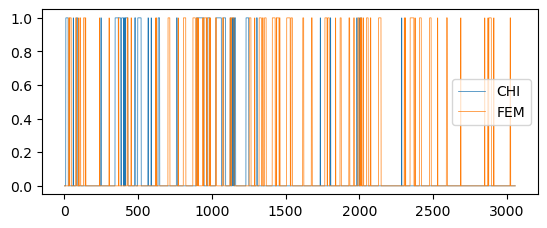

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=[6.4,2.4])
plt.plot(grids["vtc"][:,0], label="CHI", lw=0.5)
plt.plot(grids["vtc"][:,2], label="FEM", lw=0.5)
plt.legend()

Text(50.722222222222214, 0.5, 'vtc')

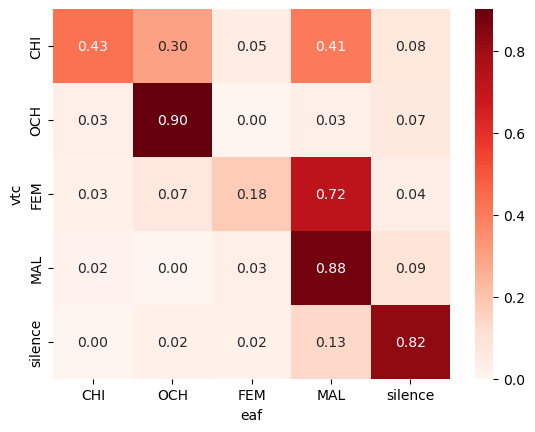

In [12]:
import numpy as np
import seaborn as sns
from ChildProject.metrics import conf_matrix

confusion_counts = conf_matrix(grids["vtc"], grids["eaf"])
confusion = confusion_counts/np.sum(grids["vtc"], axis = 0)[:,None]

labels = speakers + ["silence"]
sns.heatmap(
    confusion,
    annot = True,
    fmt = '.2f',
    cmap = 'Reds',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel('eaf')
plt.ylabel('vtc')